# Определение перспективного тарифа для телеком компании

<h1>Содержание<span class="tocSkip"></span></h1>


<div class="toc"><ul class="toc-item"><li><span><a href="#Описание-проекта" data-toc-modified-id="Описание-проекта-1"><span class="toc-item-num">1&nbsp;&nbsp;</span>Описание проекта</a></span></li><li><span><a href="#Описание-тарифов" data-toc-modified-id="Описание-тарифов-2"><span class="toc-item-num">2&nbsp;&nbsp;</span>Описание тарифов</a></span></li><li><span><a href="#Изучение-данных-из-файлов" data-toc-modified-id="Изучение-данных-из-файлов-3"><span class="toc-item-num">3&nbsp;&nbsp;</span>Изучение данных из файлов</a></span></li><li><span><a href="#Подготовка-данных" data-toc-modified-id="Подготовка-данных-4"><span class="toc-item-num">4&nbsp;&nbsp;</span>Подготовка данных</a></span></li><li><span><a href="#Анализ-данных" data-toc-modified-id="Анализ-данных-5"><span class="toc-item-num">5&nbsp;&nbsp;</span>Анализ данных</a></span></li><li><span><a href="#Проверка-гипотез" data-toc-modified-id="Проверка-гипотез-6"><span class="toc-item-num">6&nbsp;&nbsp;</span>Проверка гипотез</a></span></li><li><span><a href="#Общий-вывод" data-toc-modified-id="Общий-вывод-7"><span class="toc-item-num">7&nbsp;&nbsp;</span>Общий вывод</a></span></li></ul></div>

## Описание проекта

<b>Я</b> аналитик компании «Мегалайн» — федерального оператора сотовой связи. Клиентам предлагают два тарифных плана: «Смарт» и «Ультра». Чтобы скорректировать рекламный бюджет, коммерческий департамент хочет понять, какой тариф приносит больше денег.

<b>Мне</b> предстоит сделать предварительный анализ тарифов на небольшой выборке клиентов. В <b>моем</b> распоряжении данные 500 пользователей «Мегалайна»: кто они, откуда, каким тарифом пользуются, сколько звонков и сообщений каждый отправил за 2018 год. Нужно проанализировать поведение клиентов и сделать вывод — какой тариф лучше.

## Описание тарифов

**Тариф «Смарт»**

    Ежемесячная плата: 550 рублей
    Включено 500 минут разговора, 50 сообщений и 15 Гб интернет-трафика
    Стоимость услуг сверх тарифного пакета:
    -минута разговора: 3 рубля
    -сообщение: 3 рубля
    -1 Гб интернет-трафика: 200 рублей

**Тариф «Ультра»**

    Ежемесячная плата: 1950 рублей
    Включено 3000 минут разговора, 1000 сообщений и 30 Гб интернет-трафика
    Стоимость услуг сверх тарифного пакета:
    -минута разговора: 1 рубль
    -сообщение: 1 рубль
    -1 Гб интернет-трафика: 150 рублей

## Изучение данных из файлов

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from scipy import stats as st

data_calls = pd.read_csv('/datasets/calls.csv')
data_internet = pd.read_csv('/datasets/internet.csv')
data_messages = pd.read_csv('/datasets/messages.csv')
data_tariffs = pd.read_csv('/datasets/tariffs.csv')
data_users = pd.read_csv('/datasets/users.csv')

**Почему следует избавляться от нулей в начальных датасетах?**

Задание звучит "коммерческий департамент хочет понять, какой тариф приносит больше денег". Нулевые значения денег не приносят.

**Нулевые значения**

In [2]:
print('Процент нулевых значений в датасете со звонками:', len(data_calls[data_calls['duration'] == 0])/ len(data_calls['duration']) * 100)
print('Процент нулевых значений в датасете с сообщениями:', 0.0368052999631947, '(расчеты смотреть ниже в графе "сообщения")') 
print('Процент нулевых значений в датасете с интернетом:', len(data_internet[data_internet['mb_used'] == 0])/ len(data_internet['mb_used']) * 100) 

Процент нулевых значений в датасете со звонками: 19.551644316336553
Процент нулевых значений в датасете с сообщениями: 0.0368052999631947 (расчеты смотреть ниже в графе "сообщения")
Процент нулевых значений в датасете с интернетом: 13.118155773916303


# Звонки

In [3]:
print('Изначальное инфо о датасете:')
data_calls.info() # инфо о датасете в целом
print('Дубликатов:', data_calls.duplicated().sum()) # количество дубликатов
print(data_calls['duration'].value_counts().sort_index()) # количество уникальных значений столбца 'duration', в первую очередь для того, чтобы понять сколько нулевых значений

Изначальное инфо о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 202607 entries, 0 to 202606
Data columns (total 4 columns):
id           202607 non-null object
call_date    202607 non-null object
duration     202607 non-null float64
user_id      202607 non-null int64
dtypes: float64(1), int64(1), object(2)
memory usage: 6.2+ MB
Дубликатов: 0
0.00     39613
0.01       101
0.02        84
0.03        80
0.04        85
         ...  
35.95        1
36.12        1
36.47        1
37.35        1
38.00        1
Name: duration, Length: 2871, dtype: int64


Разброс значений от 0 до 38. Нет пропусков и дубликатов.

In [4]:
# Приведение данных к нужным типам
data_calls = data_calls.loc[~(data_calls['duration'] == 0.00)].reset_index() # удаление нулевых значений
data_calls['duration'] = data_calls['duration'].apply(np.ceil).astype('int64') # приведение типов к инт и округление до большего значения, согласно примечанию

Удаление нулевых значений согласно вердикту выше.

Округление вверх и приведение к нужным типам для удобства.

In [5]:
# Удаление столбца 'Index'
data_calls = data_calls.drop(['index'], axis = 1)

In [6]:
# Добавление столбика "месяц"
data_calls['call_date'] = pd.to_datetime(data_calls['call_date'])
data_calls['month'] = data_calls['call_date'].dt.month
data_calls = data_calls.drop(['call_date'], axis = 1)

Разделение звонков по месяцам относительно даты в датафрейме, дабы потом по месяцам будем группировать в сводную таблицу. 

Удаляем ненужные значения и столбцы.

In [7]:
data_calls = data_calls.drop(['id'], axis = 1)
print('Датасет после предобработки:')
data_calls.head(10)

Датасет после предобработки:


,duration,user_id,month
0,3,1000,6
1,14,1000,9
2,6,1000,12
3,19,1000,8
4,19,1000,9
5,6,1000,8
6,19,1000,5
7,3,1000,7
8,8,1000,9
9,10,1000,12


**Вывод и первичная предобработка**

Всего 202607 уникальных значений без дубликатов.

Нули необходимо удалить, значения столбика "duration" округлить до потолка, согласно примечанию к заданию, и переводим в тип целочисленных значений. Лишний и ненужный столбец "index" удаляем. Добавляем столбец "month", необходимый для дальнейшей подготовки данных и удаляем столбец с датой, чтобы не мешался.

**Построение сводной таблицы, сгруппированной по user_id и month**

In [8]:
data_calls.rename(columns = {'duration':'calls_duration'}, inplace = True) # переименование столбца
data_calls['calls_quantity'] = 1 # добавление нового столбца дабы посчитать количество звонков
data_calls = pd.pivot_table(data_calls, index=['user_id', 'month'], aggfunc=np.sum)
data_calls.head(10)

calls_duration  calls_quantity
user_id month                                
1000    5                 159              17
        6                 172              28
        7                 340              41
        8                 408              42
        9                 466              46
        10                350              44
        11                338              37
        12                333              38
1001    11                430              45
        12                414              47

# Интернет

In [9]:
print('Изначальное инфо о датасете:')
data_internet.info() # инфо о датасете в целом
print('Дубликатов:', data_internet.duplicated().sum()) # количество дубликатов
print(data_internet['mb_used'].value_counts().sort_index()) # количество уникальных значений столбца 'mb_used', в первую очередь для того, чтобы понять сколько нулевых значений

Изначальное инфо о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 149396 entries, 0 to 149395
Data columns (total 5 columns):
Unnamed: 0      149396 non-null int64
id              149396 non-null object
mb_used         149396 non-null float64
session_date    149396 non-null object
user_id         149396 non-null int64
dtypes: float64(1), int64(2), object(2)
memory usage: 5.7+ MB
Дубликатов: 0
0.00       19598
0.03           1
0.04           1
0.06           1
0.07           2
           ...  
1623.92        1
1651.25        1
1651.55        1
1702.75        1
1724.83        1
Name: mb_used, Length: 70003, dtype: int64


In [10]:
# Приведение данных к нужным типам
data_internet = data_internet.loc[~(data_internet['mb_used'] == 0.00)].reset_index() # удаление нулевых значений

Удаляем нулевые значения согласно сделаным выводам.

In [11]:
# Удаление столбца 'Unnamed' и 'index'
data_internet = data_internet.drop(['Unnamed: 0'], axis = 1)
data_internet = data_internet.drop(['index'], axis = 1)

Удаляем ненужные столбцы.

In [12]:
# Добавление столбика "месяц"
data_internet['session_date'] = pd.to_datetime(data_internet['session_date'])
data_internet['month'] = data_internet['session_date'].dt.month
data_internet = data_internet.drop(['session_date'], axis = 1)

Разделение звонков по месяцам относительно даты в датафрейме, дабы потом по месяцам будем группировать в сводную таблицу. 

Удаляем ненужные значения и столбцы.

In [13]:
data_internet = data_internet.drop(['id'], axis = 1)

print('Датасет после предобработки:')
data_internet.head(10)

Датасет после предобработки:


,mb_used,user_id,month
0,112.95,1000,11
1,1052.81,1000,9
2,1197.26,1000,6
3,550.27,1000,8
4,302.56,1000,9
5,399.97,1000,10
6,540.08,1000,9
7,415.70,1000,7
8,505.40,1000,10
9,345.54,1000,9


**Вывод и первичная предобработка**

Всего 149396 уникальных значений без дубликатов.

Нули необходимо удалить, значения столбика "mb_used" округлить до потолка, согласно примечанию к заданию, переводим мегабайты в гигабайты, а далее в тип целочисленных значений. Лишний и ненужный столбец "Unnamed: 0" и "index" удаляем. Добавляем столбец "month", необходимый для дальнейшей подготовки данных и удаляем столбец с датой и с мегабайтами, чтобы не мешались.

**Построение сводной таблицы, сгруппированной по user_id и month**

In [14]:
data_internet = pd.pivot_table(data_internet, index=['user_id', 'month'], aggfunc=np.sum)
data_internet['gb_used'] = (data_internet['mb_used'] / 1024).apply(np.ceil).astype('int64')
data_internet = data_internet.drop(['mb_used'], axis = 1)
data_internet.head(10)

gb_used
user_id month         
1000    5            3
        6           23
        7           14
        8           14
        9           15
        10          15
        11          15
        12          10
1001    11          18
        12          14

# Сообщения

In [15]:
print('Изначальное инфо о датасете:')
data_messages.info() # инфо о датасете в целом
print('Дубликатов:', data_messages.duplicated().sum()) # количество дубликатов

Изначальное инфо о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 123036 entries, 0 to 123035
Data columns (total 3 columns):
id              123036 non-null object
message_date    123036 non-null object
user_id         123036 non-null int64
dtypes: int64(1), object(2)
memory usage: 2.8+ MB
Дубликатов: 0


Информация о датасете и количестве дубликатов.

In [16]:
# Добавление столбика "месяц"
data_messages['message_date'] = pd.to_datetime(data_messages['message_date'])
data_messages['month'] = data_messages['message_date'].dt.month
data_messages = data_messages.drop(['message_date'], axis = 1)

Разделение звонков по месяцам относительно даты в датафрейме, дабы потом по месяцам будем группировать в сводную таблицу. 

Удаляем ненужные значения и столбцы.

In [17]:
data_messages = data_messages.drop(['id'], axis = 1)

print('Датасет после предобработки:')
data_messages.head(10)

Датасет после предобработки:


,user_id,month
0,1000,6
1,1000,10
2,1000,8
3,1000,6
4,1000,12
5,1000,6
6,1000,11
7,1000,10
8,1000,6
9,1000,12


**Вывод и первичная предобработка**

Всего 123036 уникальных значений без дубликатов.

Добавляем столбец "month", необходимый для дальнейшей подготовки данных и удаляем столбец с датой, чтобы не мешался.

**Построение сводной таблицы, сгруппированной по user_id и month**

In [18]:
data_messages['messages_quantity'] = 1 # добавление нового столбца дабы посчитать количество сообщений
data_messages = pd.pivot_table(data_messages, index=['user_id', 'month'], aggfunc=np.sum)
data_messages.head(10)

messages_quantity
user_id month                   
1000    5                     22
        6                     60
        7                     75
        8                     81
        9                     57
        10                    73
        11                    58
        12                    70
1002    6                      4
        7                     11

In [19]:
print('Процент нулевых значений в датасете с сообщениями:', len(data_messages.isna().sum())/ len(data_messages['messages_quantity']) * 100)

Процент нулевых значений в датасете с сообщениями: 0.0368052999631947


# Инфа о тарифах

In [20]:
data_tariffs.info()
data_tariffs

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2 entries, 0 to 1
Data columns (total 8 columns):
messages_included        2 non-null int64
mb_per_month_included    2 non-null int64
minutes_included         2 non-null int64
rub_monthly_fee          2 non-null int64
rub_per_gb               2 non-null int64
rub_per_message          2 non-null int64
rub_per_minute           2 non-null int64
tariff_name              2 non-null object
dtypes: int64(7), object(1)
memory usage: 256.0+ bytes


,messages_included,mb_per_month_included,minutes_included,rub_monthly_fee,rub_per_gb,rub_per_message,rub_per_minute,tariff_name
0,50,15360,500,550,200,3,3,smart
1,1000,30720,3000,1950,150,1,1,ultra


# Данные о пользователях

In [21]:
print('Изначальное инфо о датасете:')
data_users.info() # инфо о датасете в целом
print('Дубликатов:', data_users.duplicated().sum()) # количество дубликатов
print(data_users['tariff'].value_counts()) # чтобы понять, сколько людей каким тарифом пользуются

print('Датасет после предобработки:')
data_users.head(10)

Изначальное инфо о датасете:
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 500 entries, 0 to 499
Data columns (total 8 columns):
user_id       500 non-null int64
age           500 non-null int64
churn_date    38 non-null object
city          500 non-null object
first_name    500 non-null object
last_name     500 non-null object
reg_date      500 non-null object
tariff        500 non-null object
dtypes: int64(2), object(6)
memory usage: 31.4+ KB
Дубликатов: 0
smart    351
ultra    149
Name: tariff, dtype: int64
Датасет после предобработки:


,user_id,age,churn_date,city,first_name,last_name,reg_date,tariff
0,1000,52,NaN,Краснодар,Рафаил,Верещагин,2018-05-25,ultra
1,1001,41,NaN,Москва,Иван,Ежов,2018-11-01,smart
2,1002,59,NaN,Стерлитамак,Евгений,Абрамович,2018-06-17,smart
3,1003,23,NaN,Москва,Белла,Белякова,2018-08-17,ultra
4,1004,68,NaN,Новокузнецк,Татьяна,Авдеенко,2018-05-14,ultra
5,1005,67,NaN,Набережные Челны,Афанасий,Горлов,2018-01-25,smart
6,1006,21,NaN,Ульяновск,Леонид,Ермолаев,2018-02-26,smart
7,1007,65,NaN,Москва,Юна,Березина,2018-04-19,smart
8,1008,63,NaN,Челябинск,Рустэм,Пономарёв,2018-12-19,smart
9,1009,24,NaN,Пермь,Василиса,Блинова,2018-03-22,smart


**Для подготовки данных**

In [22]:
ind = list(range(1000, 1500))
data_users.index = ind
data_users_ultra = list(data_users[data_users['tariff'] == 'ultra'].index)

Создаем список из значений, равных id пользователей и внедряем его в индекс подготовленного датафрейма (в будущем). Это все делается для того, чтобы позднее можно было обратиться к id через индекс и получить его как столбец с помощью reset_index().

После создаем список юзеров с тарифом ультра дабы с помощью него заполнить столбец tariff в итоговом датафрейме, чтобы облегчить последующий анализ и все остальное.

## Подготовка данных

**Объединение таблиц в одну и добавление столбца с тарифами**

In [23]:
data = data_calls.join(data_internet, how='outer')
data = data.join(data_messages, how='outer')
data['id'] = data.index
id = []
for i in range(len(list(data['id']))):
    id.append(list(data['id'])[i][0])
data['id'] = id
data.head(10)
data['tariff'] = 'smart'
for id in data['id']:
    if id in data_users_ultra:
        data['tariff'][id] = 'ultra'

data = data.drop(['id'], axis=1)
data.head(10)

/opt/conda/lib/python3.7/site-packages/ipykernel_launcher.py:12: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: http://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  if sys.path[0] == '':


calls_duration  calls_quantity  gb_used  messages_quantity  \
user_id month                                                               
1000    5               159.0            17.0      3.0               22.0   
        6               172.0            28.0     23.0               60.0   
        7               340.0            41.0     14.0               75.0   
        8               408.0            42.0     14.0               81.0   
        9               466.0            46.0     15.0               57.0   
        10              350.0            44.0     15.0               73.0   
        11              338.0            37.0     15.0               58.0   
        12              333.0            38.0     10.0               70.0   
1001    11              430.0            45.0     18.0                NaN   
        12              414.0            47.0     14.0                NaN   

              tariff  
user_id month         
1000    5      ultra  
        6      ultra  
        7      ultra  
        8      ultra  
        9      ultra  
        10     ultra  
        11     ultra  
        12     ultra  
1001    11     smart  
        12     smart

In [24]:
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3214 entries, (1000, 5) to (1499, 12)
Data columns (total 5 columns):
calls_duration       3168 non-null float64
calls_quantity       3168 non-null float64
gb_used              3201 non-null float64
messages_quantity    2717 non-null float64
tariff               3214 non-null object
dtypes: float64(4), object(1)
memory usage: 159.1+ KB


Для облегчения последующего рассчета столбца помесячной выручки с каждого пользователя создадим столбец с названием тарифа.

In [25]:
data = data.fillna(0)
data.info()

<class 'pandas.core.frame.DataFrame'>
MultiIndex: 3214 entries, (1000, 5) to (1499, 12)
Data columns (total 5 columns):
calls_duration       3214 non-null float64
calls_quantity       3214 non-null float64
gb_used              3214 non-null float64
messages_quantity    3214 non-null float64
tariff               3214 non-null object
dtypes: float64(4), object(1)
memory usage: 159.1+ KB


Столбцы с отсутствующими данными заполним нулями, из рассчета, что, если данных нет, значит абонент тот или иной вид связи не использовал.

**Изменение типов данных в таблице**

In [26]:
data['calls_duration'] = data['calls_duration'].astype('int64')
data['calls_quantity'] = data['calls_quantity'].astype('int64')
data['gb_used'] = data['gb_used'].astype('int64')
data['messages_quantity'] = data['messages_quantity'].astype('int64')

**Добавление столбца помесячной выручки с каждого пользователя**

In [27]:
def month_income(row):
    if row['tariff'] == 'smart':
        result = 550
    if row['tariff'] == 'ultra':
        result = 1950
    return result
        
data['month_income'] = data.apply(month_income, axis = 1)

def month_income_smart(row):
    calls_duration = row.calls_duration
    messages_quantity = row.messages_quantity
    gb_used = row.gb_used
    a = 500
    a1 = 3
    b = 50 
    b1 = 3
    c = 15
    c1 = 200
    result = 550 
    minutes = (calls_duration - a) * a1
    messages = (messages_quantity - b) * b1
    gb = (gb_used - c) * c1
    if minutes >= 0:
        result += minutes
    if messages >= 0:
        result += messages
    if gb >= 0:
        result += gb
    return result

def month_income_ultra(row):
    calls_duration = row.calls_duration
    messages_quantity = row.messages_quantity
    gb_used = row.gb_used
    a = 3000
    a1 = 1
    b = 1000
    b1 = 1
    c = 30
    c1 = 150
    result = 1950
    minutes = (calls_duration - a) * a1
    messages = (messages_quantity - b) * b1
    gb = (gb_used - c) * c1
    if minutes >= 0:
        result += minutes
    if messages >= 0:
        result += messages
    if gb >= 0:
        result += gb
    return result

new_column = []
for i in range(len(data)):
    if data.iloc[i].month_income == data_tariffs['rub_monthly_fee'][0]:
        k = month_income_smart(data.iloc[i])
    if data.iloc[i].month_income == data_tariffs['rub_monthly_fee'][1]:
        k = month_income_ultra(data.iloc[i])
    new_column.append(k)

data['month_income'] = new_column

In [28]:
data.head(10)

calls_duration  calls_quantity  gb_used  messages_quantity  \
user_id month                                                               
1000    5                 159              17        3                 22   
        6                 172              28       23                 60   
        7                 340              41       14                 75   
        8                 408              42       14                 81   
        9                 466              46       15                 57   
        10                350              44       15                 73   
        11                338              37       15                 58   
        12                333              38       10                 70   
1001    11                430              45       18                  0   
        12                414              47       14                  0   

              tariff  month_income  
user_id month                       
1000    5      ultra          1950  
        6      ultra          1950  
        7      ultra          1950  
        8      ultra          1950  
        9      ultra          1950  
        10     ultra          1950  
        11     ultra          1950  
        12     ultra          1950  
1001    11     smart          1150  
        12     smart           550

Путем заполнения столбика с помощью функций мы получили столбец со значениями выручки с каждого пользователя (месячный платеж + плата за услуги сверх тарифного плана, если они имеются).

In [29]:
data['month_income'].describe()

count    3214.000000
mean     1529.076229
std       798.251091
min       550.000000
25%       750.000000
50%      1653.500000
75%      1950.000000
max      6770.000000
Name: month_income, dtype: float64

## Анализ данных

Опишите поведение клиентов оператора, исходя из выборки. Сколько минут разговора, сколько сообщений и какой объём интернет-трафика требуется пользователям каждого тарифа в месяц? Посчитайте среднее количество, дисперсию и стандартное отклонение. Постройте гистограммы. Опишите распределения.

In [30]:
smart = data.query('tariff == "smart"')
ultra = data.query('tariff == "ultra"')

**Минуты разговора**

Smart

Среднее количество = 417.9349484073576
Дисперсия = 36203.06665209469
Стандартное отклонение = 190.31372988921288


(array([ 30.,  29.,  34.,  41.,  43.,  53.,  66.,  83.,  84., 103., 105.,
        108., 127., 119., 115., 136., 141., 122., 130., 105.,  83.,  86.,
         62.,  51.,  41.,  40.,  25.,  14.,   7.,  12.,   9.,   4.,   3.,
          3.,   2.,   2.,   0.,   1.,   0.,   1.,   0.,   0.,   0.,   0.,
          0.,   0.,   0.,   0.,   0.,   1.]),
 array([   2.  ,   30.66,   59.32,   87.98,  116.64,  145.3 ,  173.96,
         202.62,  231.28,  259.94,  288.6 ,  317.26,  345.92,  374.58,
         403.24,  431.9 ,  460.56,  489.22,  517.88,  546.54,  575.2 ,
         603.86,  632.52,  661.18,  689.84,  718.5 ,  747.16,  775.82,
         804.48,  833.14,  861.8 ,  890.46,  919.12,  947.78,  976.44,
        1005.1 , 1033.76, 1062.42, 1091.08, 1119.74, 1148.4 , 1177.06,
        1205.72, 1234.38, 1263.04, 1291.7 , 1320.36, 1349.02, 1377.68,
        1406.34, 1435.  ]),
 <a list of 50 Patch objects>)

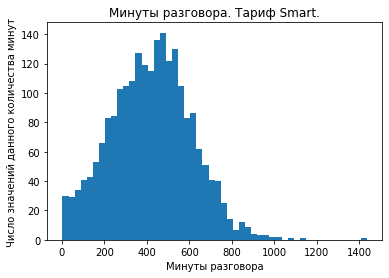

In [31]:
print('Среднее количество =', smart['calls_duration'].describe()[1])
print('Дисперсия =', np.var(smart['calls_duration']))
print('Стандартное отклонение =', smart['calls_duration'].describe()[2])

plt.title("Минуты разговора. Тариф Smart.")
plt.xlabel("Минуты разговора")
plt.ylabel("Число значений данного количества минут")
plt.hist(smart['calls_duration'][smart['calls_duration'] > 0], bins=50)

Датасет с отрицательной скошенностью

Достаточно много пользователей не укладываются в лимит и переплачивают за звонки. Большинство, все же, старается войти в лимит, но само среднее значение (которое можно интерпретировать как число минут, необходимых пользователям данного тарифа в месяц) находится близко к "границе дозволенного".

Пользователи не потребляют услуги хаотично, так как датасет напоминает датасет нормального распределения с отрицательной скошенностью.

Ultra

Среднее количество = 526.6233502538071
Дисперсия = 100771.2236172022
Стандартное отклонение = 317.6060978591264


(array([19., 21., 25., 22., 22., 20., 27., 33., 33., 38., 33., 38., 29.,
        40., 36., 46., 43., 33., 38., 28., 36., 27., 37., 23., 38., 36.,
        14., 15., 14.,  9., 11.,  9.,  8.,  7.,  5.,  6., 10.,  4.,  5.,
         4.,  1.,  1.,  1.,  0.,  0.,  0.,  0.,  0.,  1.,  1.]),
 array([1.00000e+00, 3.44400e+01, 6.78800e+01, 1.01320e+02, 1.34760e+02,
        1.68200e+02, 2.01640e+02, 2.35080e+02, 2.68520e+02, 3.01960e+02,
        3.35400e+02, 3.68840e+02, 4.02280e+02, 4.35720e+02, 4.69160e+02,
        5.02600e+02, 5.36040e+02, 5.69480e+02, 6.02920e+02, 6.36360e+02,
        6.69800e+02, 7.03240e+02, 7.36680e+02, 7.70120e+02, 8.03560e+02,
        8.37000e+02, 8.70440e+02, 9.03880e+02, 9.37320e+02, 9.70760e+02,
        1.00420e+03, 1.03764e+03, 1.07108e+03, 1.10452e+03, 1.13796e+03,
        1.17140e+03, 1.20484e+03, 1.23828e+03, 1.27172e+03, 1.30516e+03,
        1.33860e+03, 1.37204e+03, 1.40548e+03, 1.43892e+03, 1.47236e+03,
        1.50580e+03, 1.53924e+03, 1.57268e+03, 1.60612e+03,

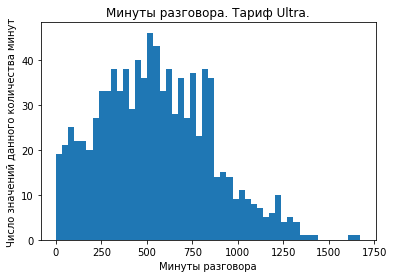

In [32]:
print('Среднее количество =', ultra['calls_duration'].describe()[1])
print('Дисперсия =', np.var(ultra['calls_duration']))
print('Стандартное отклонение =', ultra['calls_duration'].describe()[2])

plt.title("Минуты разговора. Тариф Ultra.")
plt.xlabel("Минуты разговора")
plt.ylabel("Число значений данного количества минут")
plt.hist(ultra['calls_duration'][ultra['calls_duration'] > 0], bins=50)

Датасет с отрицательной скошенностью

Почти все пользователи укладываются в лимит и не переплачивают за звонки. Само среднее значение близко к последнему предыдущего датафрейма (его также можно интерпретировать как число минут, необходимых пользователям данного тарифа в месяц).

Пользователи не потребляют услуги хаотично, так как датасет напоминает датасет нормального распределения с отрицательной скошенностью.

**Сообщения**

Smart

Среднее количество = 33.384028712427096
Дисперсия = 796.455482917076
Стандартное отклонение = 28.22787555676141


(array([78., 78., 78., 89., 99., 91., 67., 88., 93., 89., 84., 74., 41.,
        78., 67., 65., 82., 58., 30., 56., 43., 43., 49., 32., 18., 35.,
        26., 31., 20., 25.,  8., 17., 14., 12., 14., 13., 11.,  5.,  6.,
         2.,  2.,  0.,  1.,  2.,  1.,  1.,  2.,  2.,  1.,  1.]),
 array([  1.  ,   3.84,   6.68,   9.52,  12.36,  15.2 ,  18.04,  20.88,
         23.72,  26.56,  29.4 ,  32.24,  35.08,  37.92,  40.76,  43.6 ,
         46.44,  49.28,  52.12,  54.96,  57.8 ,  60.64,  63.48,  66.32,
         69.16,  72.  ,  74.84,  77.68,  80.52,  83.36,  86.2 ,  89.04,
         91.88,  94.72,  97.56, 100.4 , 103.24, 106.08, 108.92, 111.76,
        114.6 , 117.44, 120.28, 123.12, 125.96, 128.8 , 131.64, 134.48,
        137.32, 140.16, 143.  ]),
 <a list of 50 Patch objects>)

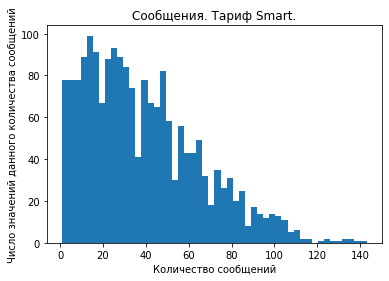

In [33]:
print('Среднее количество =', smart['messages_quantity'].describe()[1])
print('Дисперсия =', np.var(smart['messages_quantity']))
print('Стандартное отклонение =', smart['messages_quantity'].describe()[2])

plt.title("Сообщения. Тариф Smart.")
plt.xlabel("Количество сообщений")
plt.ylabel("Число значений данного количества сообщений")
plt.hist(smart['messages_quantity'][smart['messages_quantity'] > 0], bins=50)

Датасет линейно убывает в сторону более высоких значений

Достаточно много пользователей не укладываются в лимит и переплачивают за сообщения. Большинство, все же, старается войти в лимит, но само среднее значение (которое можно интерпретировать как число сообщений, необходимое пользователям данного тарифа в месяц) находится достаточно близко к "границе дозволенного".

Пользователи не потребляют услуги хаотично, так как датасет линейно убывает в сторону более высоких значений, что соответствует потребностям людей и "правилам" тарифного плана.

Ultra

Среднее количество = 49.36345177664975
Дисперсия = 2282.9460753948824
Стандартное отклонение = 47.80445735017472


(array([50., 29., 27., 38., 49., 34., 42., 21., 42., 27., 37., 27., 28.,
        24., 19., 18., 27., 29., 23., 16., 18., 17., 15., 11.,  7.,  9.,
        11.,  4., 15.,  8., 11.,  8., 10.,  5., 10.,  3.,  3.,  2.,  5.,
         2.,  4.,  2.,  3.,  1.,  1.,  0.,  0.,  1.,  0.,  2.]),
 array([  1.  ,   5.46,   9.92,  14.38,  18.84,  23.3 ,  27.76,  32.22,
         36.68,  41.14,  45.6 ,  50.06,  54.52,  58.98,  63.44,  67.9 ,
         72.36,  76.82,  81.28,  85.74,  90.2 ,  94.66,  99.12, 103.58,
        108.04, 112.5 , 116.96, 121.42, 125.88, 130.34, 134.8 , 139.26,
        143.72, 148.18, 152.64, 157.1 , 161.56, 166.02, 170.48, 174.94,
        179.4 , 183.86, 188.32, 192.78, 197.24, 201.7 , 206.16, 210.62,
        215.08, 219.54, 224.  ]),
 <a list of 50 Patch objects>)

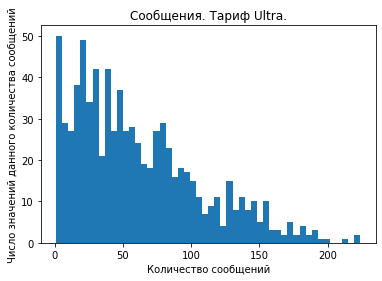

In [34]:
print('Среднее количество =', ultra['messages_quantity'].describe()[1])
print('Дисперсия =', np.var(ultra['messages_quantity']))
print('Стандартное отклонение =', ultra['messages_quantity'].describe()[2])

plt.title("Сообщения. Тариф Ultra.")
plt.xlabel("Количество сообщений")
plt.ylabel("Число значений данного количества сообщений")
plt.hist(ultra['messages_quantity'][ultra['messages_quantity'] > 0], bins=50)

Датасет линейно убывает в сторону более высоких значений

Почти все пользователи даже и близко не достигают порогового значения для тарифа количества сообщений. Число сообщений, необходимое пользователям данного тарифа в месяц не слишком сильно отличается от последнего у пользователей тарифа Smart.

Пользователи не потребляют услуги хаотично, так как датасет линейно убывает в сторону более высоких значений, что соответствует потребностям людей, не смотря на то, что "правила" тарифного плана позволяют отправлять до 1000 смс в месяц.

**Интернет трафик**

Smart

Среднее количество = 16.328847016599372
Дисперсия = 33.013887454837445
Стандартное отклонение = 5.7470605685090534


(array([ 17.,  16.,  25.,   0.,  16.,  26.,  25.,   0.,  36.,  34.,  71.,
          0.,  49.,  83., 116.,   0., 119., 148., 142.,   0., 174., 183.,
        150.,   0., 155., 140.,   0., 115., 114.,  72.,   0.,  50.,  53.,
         28.,   0.,  22.,  18.,   7.,   0.,   5.,   7.,   3.,   0.,   0.,
          1.,   3.,   0.,   2.,   1.,   1.]),
 array([ 1.  ,  1.74,  2.48,  3.22,  3.96,  4.7 ,  5.44,  6.18,  6.92,
         7.66,  8.4 ,  9.14,  9.88, 10.62, 11.36, 12.1 , 12.84, 13.58,
        14.32, 15.06, 15.8 , 16.54, 17.28, 18.02, 18.76, 19.5 , 20.24,
        20.98, 21.72, 22.46, 23.2 , 23.94, 24.68, 25.42, 26.16, 26.9 ,
        27.64, 28.38, 29.12, 29.86, 30.6 , 31.34, 32.08, 32.82, 33.56,
        34.3 , 35.04, 35.78, 36.52, 37.26, 38.  ]),
 <a list of 50 Patch objects>)

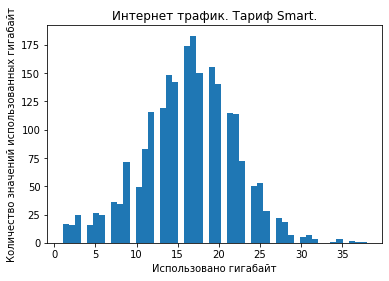

In [35]:
print('Среднее количество =', smart['gb_used'].describe()[1])
print('Дисперсия =', np.var(smart['gb_used']))
print('Стандартное отклонение =', smart['gb_used'].describe()[2])

plt.title("Интернет трафик. Тариф Smart.")
plt.xlabel("Использовано гигабайт")
plt.ylabel("Количество значений использованных гигабайт")
plt.hist(smart['gb_used'][smart['gb_used'] > 0], bins=50)

Датасет с нормальным распределением

Большинство пользователей превышает "пороговое" значение и переплачивает за используемые гб интернета. Среднее число гб интернета можно интерпретировать как число гб, необходимое пользователям данного тарифа в месяц.

Пользователи не потребляют услуги хаотично, так как датасет похож на датасет с нормальным распределением, что соответствует потребностям людей, не смотря на то, что "правила" тарифного плана позволяют использовать бесплатно только до 15 гб в месяц.

Ultra

Среднее количество = 19.494416243654822
Дисперсия = 96.99311602978692
Стандартное отклонение = 9.853511367510293


(array([ 9.,  8., 18., 18., 19., 17., 16., 27., 26., 32., 29., 31., 21.,
        31., 37., 40., 40., 31., 44., 36., 43., 41., 33., 21.,  0., 32.,
        20., 36., 37., 30., 17., 12., 21., 18., 13., 10.,  7., 10.,  9.,
         9.,  4.,  2.,  9.,  6.,  1.,  1.,  0.,  0.,  1.,  1.]),
 array([ 1.  ,  1.96,  2.92,  3.88,  4.84,  5.8 ,  6.76,  7.72,  8.68,
         9.64, 10.6 , 11.56, 12.52, 13.48, 14.44, 15.4 , 16.36, 17.32,
        18.28, 19.24, 20.2 , 21.16, 22.12, 23.08, 24.04, 25.  , 25.96,
        26.92, 27.88, 28.84, 29.8 , 30.76, 31.72, 32.68, 33.64, 34.6 ,
        35.56, 36.52, 37.48, 38.44, 39.4 , 40.36, 41.32, 42.28, 43.24,
        44.2 , 45.16, 46.12, 47.08, 48.04, 49.  ]),
 <a list of 50 Patch objects>)

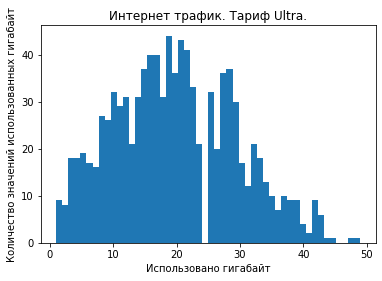

In [36]:
print('Среднее количество =', ultra['gb_used'].describe()[1])
print('Дисперсия =', np.var(ultra['gb_used']))
print('Стандартное отклонение =', ultra['gb_used'].describe()[2])

plt.title("Интернет трафик. Тариф Ultra.")
plt.xlabel("Использовано гигабайт")
plt.ylabel("Количество значений использованных гигабайт")
plt.hist(ultra['gb_used'][ultra['gb_used'] > 0], bins=50)

Датасет с еле заметной отрицательной скошенностью

Большинство пользователей не превышает "пороговое" значение и не так много абонентов переплачивают за используемые гб интернета. Среднее число гб интернета можно интерпретировать как число гб, необходимое пользователям данного тарифа в месяц и оно не сильно отличается от последнего у пользователей тарифа Smart.

Пользователи не потребляют услуги хаотично, так как датасет похож на датасет с нормальным распределением с тенденцией к отрицательной скошенности, что соответствует потребностям людей, не смотря на то, что "правила" тарифного плана позволяют использовать в два раза большее количество интернет трафика, чем пользователи тарифа Smart.

## Проверка гипотез

**Средняя выручка пользователей тарифов «Ультра» и «Смарт» различается**

Нулевая гипотеза H₀ - средняя выручка пользователей тарифов «Ультра» и «Смарт» НЕ различается.

Альтернативная гипотеза H₁ - средняя выручка пользователей тарифов «Ультра» и «Смарт» различается.

Дисперсия smart = 669485.2209234245
Дисперсия ultra = 141373.07325620347
p-значение:  4.2606313931076085e-250


(array([851.,  12.,   0.,  21.,  18.,   0.,  13.,  10.,   0.,   7.,   0.,
         10.,   9.,   0.,   9.,   4.,   0.,   2.,   9.,   0.,   6.,   0.,
          1.,   1.,   0.,   0.,   0.,   0.,   1.,   1.]),
 array([1950., 2045., 2140., 2235., 2330., 2425., 2520., 2615., 2710.,
        2805., 2900., 2995., 3090., 3185., 3280., 3375., 3470., 3565.,
        3660., 3755., 3850., 3945., 4040., 4135., 4230., 4325., 4420.,
        4515., 4610., 4705., 4800.]),
 <a list of 30 Patch objects>)

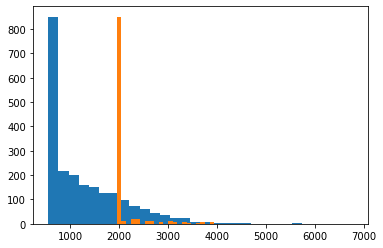

In [37]:
print('Дисперсия smart =', np.var(smart['month_income']))
print('Дисперсия ultra =', np.var(ultra['month_income']))
from scipy import stats as st
results = st.ttest_ind(smart['month_income'], ultra['month_income'], equal_var = False)
# equal_var - считать ли равными дисперсии выборок, по умолчанию имеет значение true
print('p-значение: ', results.pvalue)

plt.hist(smart['month_income'], bins=30)
plt.hist(ultra['month_income'], bins=30)

Р значение значительно меньше общепринятых пороговых значений 5% и 1%. Это есть вероятность получить результат, что средняя выручка пользователей тарифов «Ультра» и «Смарт» равна.

Гипотезу можно отвергнуть.

И действительно...

In [38]:
print('Средняя выручка пользователей тарифа «Смарт»:', smart['month_income'].mean())
print('Средняя выручка пользователей тарифа «Ультра»:', ultra['month_income'].mean())

Средняя выручка пользователей тарифа «Смарт»: 1289.9735307312696
Средняя выручка пользователей тарифа «Ультра»: 2070.1522842639592


Средняя выручка пользователей тарифа «Смарт» больше средней выручки пользователей тарифа «Ультра»

**Средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов**

Добавим столбик с городом к основному датафрейму

In [39]:
data_plus = data.reset_index()

In [40]:
moscow = list(data_users.query('city == "Москва"')['user_id'])

def cities(row):
    userid = row['user_id']
    if userid in moscow:
        return 'Moscow'
    else:
        return 'Other'
    
data_plus['regions'] = data_plus.apply(cities, axis=1)

In [41]:
msk = data_plus.query('regions == "Moscow"')
oth = data_plus.query('regions == "Other"')

Нулевая гипотеза H₀ - средняя выручка пользователей из Москвы НЕ отличается от выручки пользователей из других регионов.

Альтернативная гипотеза H₁ - средняя выручка пользователей из Москвы отличается от выручки пользователей из других регионов.


Дисперсия msk = 564710.7117467273
Дисперсия oth = 653886.3270894174
p-значение:  0.5440152911670224


(array([699., 181., 164., 130., 128.,  97., 771.,  87.,  93.,  59.,  48.,
         40.,  25.,  29.,  10.,  14.,  10.,   3.,   5.,   3.,   1.,   1.,
          1.,   0.,   3.,   0.,   0.,   0.,   0.,   1.]),
 array([ 550.        ,  757.33333333,  964.66666667, 1172.        ,
        1379.33333333, 1586.66666667, 1794.        , 2001.33333333,
        2208.66666667, 2416.        , 2623.33333333, 2830.66666667,
        3038.        , 3245.33333333, 3452.66666667, 3660.        ,
        3867.33333333, 4074.66666667, 4282.        , 4489.33333333,
        4696.66666667, 4904.        , 5111.33333333, 5318.66666667,
        5526.        , 5733.33333333, 5940.66666667, 6148.        ,
        6355.33333333, 6562.66666667, 6770.        ]),
 <a list of 30 Patch objects>)

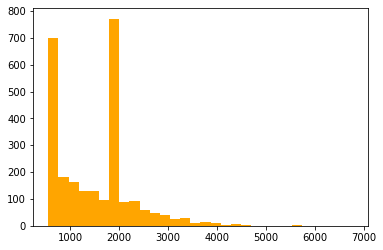

In [42]:
print('Дисперсия msk =', np.var(msk['month_income']))
print('Дисперсия oth =', np.var(oth['month_income']))
from scipy import stats as st
results = st.ttest_ind(msk['month_income'], oth['month_income'], equal_var = True)
# equal_var - считать ли равными дисперсии выборок, по умолчанию имеет значение true
print('p-значение: ', results.pvalue)

plt.hist(msk['month_income'], bins=30, color = 'blue')
plt.hist(oth['month_income'], bins=30, color = 'orange')

Р значение больше общепринятых пороговых значений 5% и 1%. Это есть вероятность получить результат, что средняя выручка пользователей тарифов «Ультра» и «Смарт» равна.



## Общий вывод

1) Средняя выручка пользователей тарифов «Ультра» больше средней выручки пользователей тарифов «Смарт».

2) Средняя выручка пользователей из Москвы не отличается от выручки пользователей из других регионов.

Какой тариф лучше и какой из них выбрать для продвижения?

Ответ - тариф Ultra. Причины:

- этим тарифом пользуется меньше людей

- в итоге больше людей переплачивает за услуги связи, которыми они не пользуются именно в рамках абонентской платы, что надежнее, чем доход с дополнительных услуг от тарифа Smart

- средняя выручка с этого тарифа больше последней тарифа Smart